Use web scraping to extract weather data from a website. Visualize the temperature trends over a week using a line chart.

A line chart showing temperature variations across 7days

Step-by-Step Approach:
1.Inspect the Website: First, we need to inspect the website that provides the historical weather data for the past 7 days. We'll assume that the website has historical data in a table or a structured format.
2.Scrape Data: Use BeautifulSoup to extract the relevant temperature data.
3.Visualize the Data: Process the data and visualize it using matplotlib.

Coordinates 52.52000045776367°N 13.419998168945312°E
Timezone b'Europe/Berlin' b'CET'
                       date  temperature_max  temperature_min
0 2024-11-16 23:00:00+00:00           7.6455           4.5955
1 2024-11-16 23:00:00+00:00           6.0455           2.4955
2 2024-11-16 23:00:00+00:00           9.0890           1.2455
3 2024-11-16 23:00:00+00:00           4.3890           2.7390
4 2024-11-16 23:00:00+00:00           3.0390          -0.4610
5 2024-11-16 23:00:00+00:00           3.4195          -1.3610
6 2024-11-16 23:00:00+00:00           4.1695           1.7195


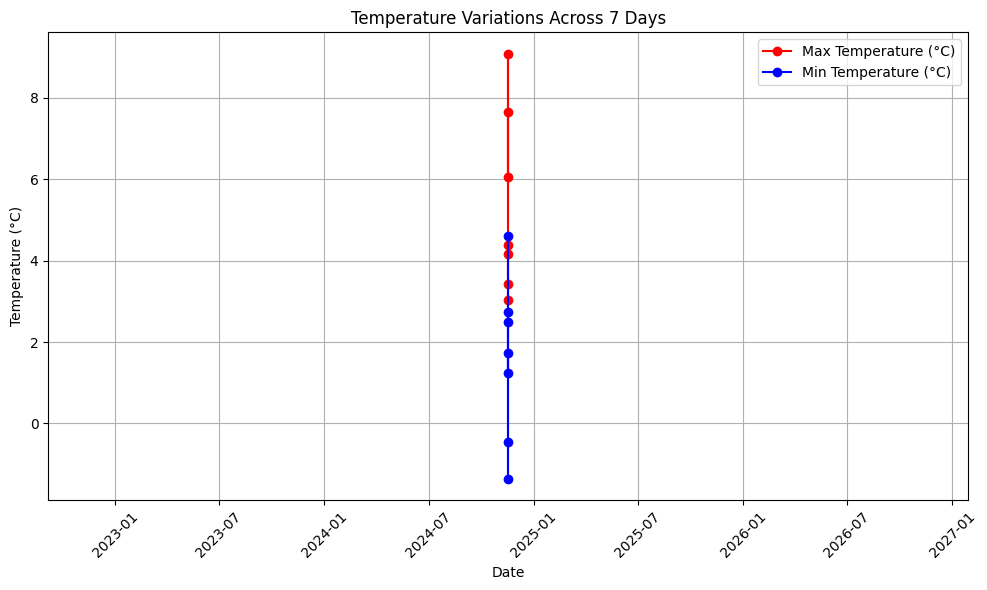

In [21]:
import openmeteo_requests
import requests_cache
import pandas as pd
import matplotlib.pyplot as plt
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after=3600)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = openmeteo_requests.Client(session=retry_session)

# Set your location (latitude and longitude) and parameters for daily data
url = "https://api.open-meteo.com/v1/forecast"
params = {
    "latitude": 52.52,  # Replace with desired latitude
    "longitude": 13.41,  # Replace with desired longitude
    "daily": ["temperature_2m_max", "temperature_2m_min"],  # Max and Min temperature for each day
    "timezone": "Europe/Berlin"  # Specify the timezone for the location
}

# Fetch weather data
responses = openmeteo.weather_api(url, params=params)

# Process the response
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")

# Process daily data
daily = response.Daily()
daily_temperature_max = daily.Variables(0).ValuesAsNumpy()  # Maximum daily temperature
daily_temperature_min = daily.Variables(1).ValuesAsNumpy()  # Minimum daily temperature
daily_dates = pd.to_datetime(daily.Time(), unit="s", utc=True)

# Create a DataFrame with the daily data
daily_data = {
    "date": daily_dates,
    "temperature_max": daily_temperature_max,
    "temperature_min": daily_temperature_min
}

daily_dataframe = pd.DataFrame(daily_data)

# Print the daily data for inspection
print(daily_dataframe)

# Plotting the temperature variations for 7 days
plt.figure(figsize=(10, 6))
plt.plot(daily_dataframe['date'], daily_dataframe['temperature_max'], marker='o', linestyle='-', color='r', label="Max Temperature (°C)")
plt.plot(daily_dataframe['date'], daily_dataframe['temperature_min'], marker='o', linestyle='-', color='b', label="Min Temperature (°C)")
plt.title("Temperature Variations Across 7 Days")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout for better display
plt.show()
